<a href="https://colab.research.google.com/github/SoujanyaMirajkar/Alzheimer-s-Disease/blob/main/Box_plots_and_removal_of_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from mpl_toolkits.mplot3d import Axes3D
data= pd.read_csv(r'/content/Alzheimer_Disease_notnull_final.csv')
data

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Type,Data_Value,Age,Gender,Ethnicity,Geolocation
0,1,2021,2021,55,55,4,0,9,28.8,34.4,1,31.60,0.0,0.0,2.0,11.0
1,2,2017,2017,35,37,4,0,9,49.1,51.6,1,50.35,1.0,0.0,2.0,11.0
2,3,2019,2019,22,24,3,9,13,13.8,14.8,1,14.30,0.0,0.0,4.0,11.0
3,4,2020,2020,49,49,4,0,9,54.5,56.4,1,55.45,1.0,0.0,2.0,11.0
4,5,2020,2020,32,31,2,14,14,12.8,18.0,1,15.40,0.0,0.0,5.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186718,186719,2017,2017,51,53,3,9,13,15.7,19.4,1,17.55,0.0,0.0,5.0,30.0
186719,186720,2016,2016,30,36,3,23,11,32.5,57.8,1,45.15,0.0,0.0,4.0,1.0
186720,186721,2019,2019,53,51,4,32,33,82.0,85.2,1,83.60,0.0,0.0,5.0,22.0
186721,186722,2018,2018,35,37,2,14,14,10.7,12.5,1,11.60,0.0,0.0,5.0,11.0


In [8]:
data.isna().sum()

RowId                    0
YearStart                0
YearEnd                  0
LocationAbbr             0
LocationDesc             0
Class                    0
Topic                    0
Question                 0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Data_Value_Type          0
Data_Value               0
Age                      0
Gender                   0
Ethnicity                0
Geolocation              0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186723 entries, 0 to 186722
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RowId                  186723 non-null  int64  
 1   YearStart              186723 non-null  int64  
 2   YearEnd                186723 non-null  int64  
 3   LocationAbbr           186723 non-null  int64  
 4   LocationDesc           186723 non-null  int64  
 5   Class                  186723 non-null  int64  
 6   Topic                  186723 non-null  int64  
 7   Question               186723 non-null  int64  
 8   Low_Confidence_Limit   186723 non-null  float64
 9   High_Confidence_Limit  186723 non-null  float64
 10  Data_Value_Type        186723 non-null  int64  
 11  Data_Value             186723 non-null  float64
 12  Age                    186723 non-null  float64
 13  Gender                 186723 non-null  float64
 14  Ethnicity              186723 non-nu

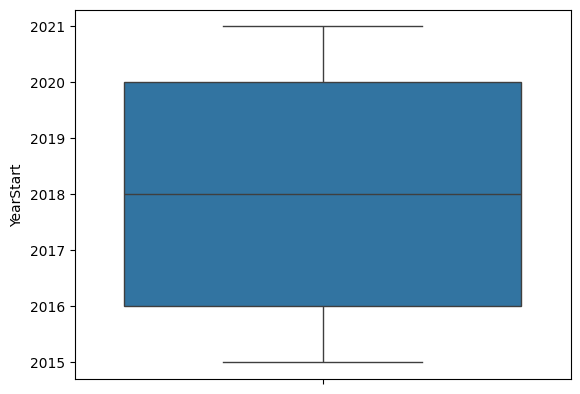

In [11]:
sns.boxplot(data['YearStart'])
plt.show()

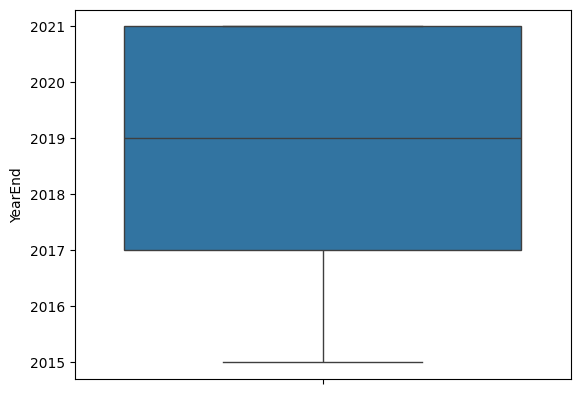

In [12]:
sns.boxplot(data['YearEnd'])
plt.show()

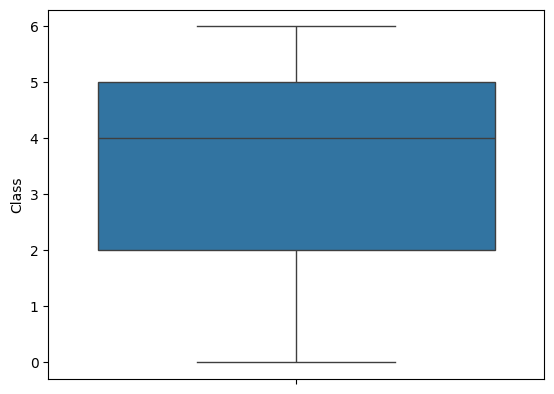

In [13]:
sns.boxplot(data['Class'])
plt.show()

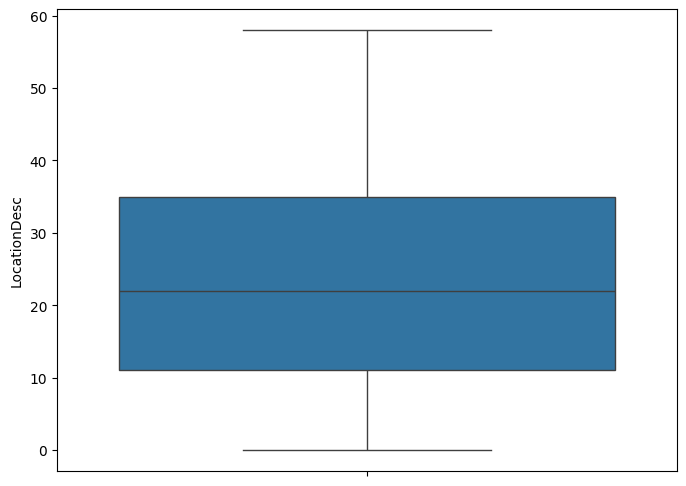

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(data['LocationDesc'])
plt.show()

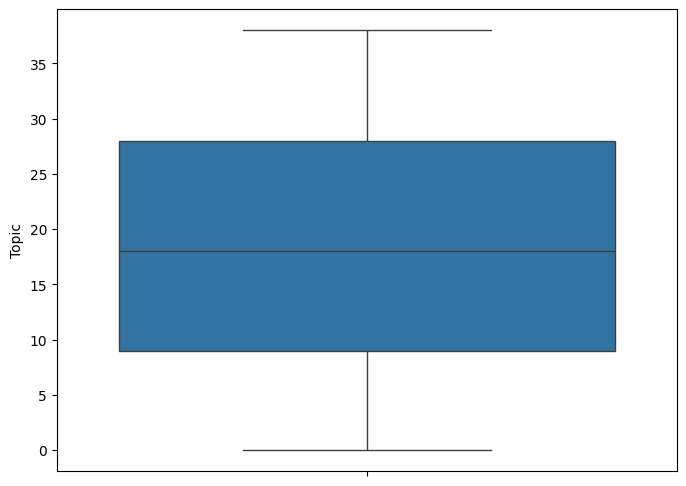

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Topic'])
plt.show()

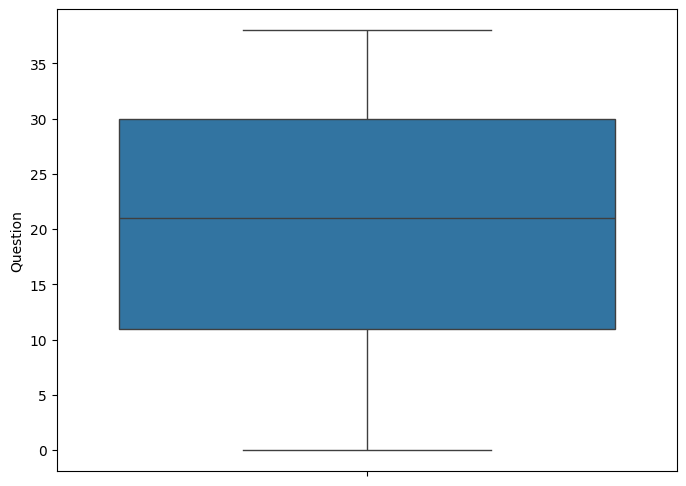

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Question'])
plt.show()

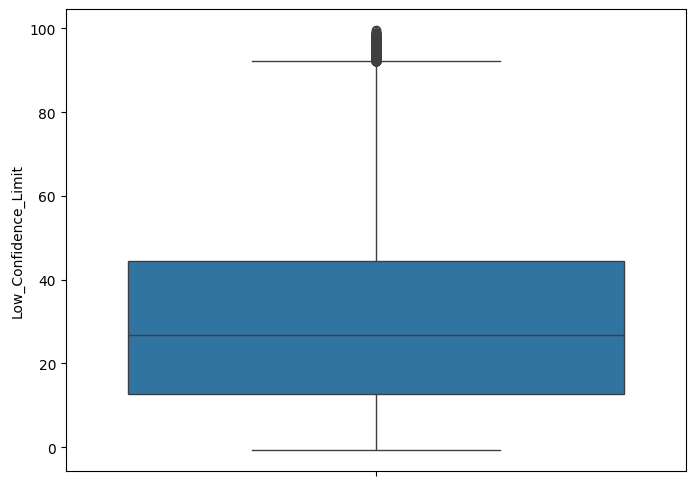

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Low_Confidence_Limit'])
plt.show()

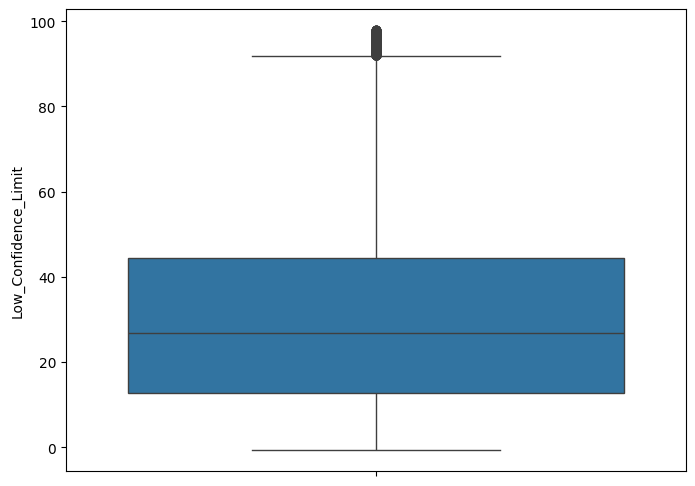

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Remove outliers from the Low_Confidence_Limit column
data['Low_Confidence_Limit'] = data['Low_Confidence_Limit'][~((data['Low_Confidence_Limit'] - data['Low_Confidence_Limit'].mean()).abs() > (3 * data['Low_Confidence_Limit'].std()))]

# Recreate the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data['Low_Confidence_Limit'])
plt.show()

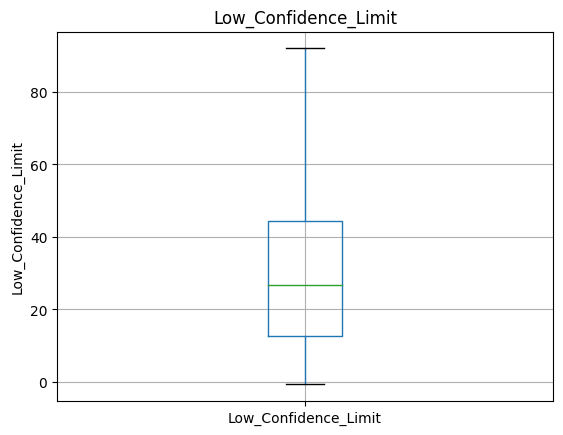

In [19]:
iqr_multiplier = 1.5
q1 = data['Low_Confidence_Limit'].quantile(0.25)
q3 = data['Low_Confidence_Limit'].quantile(0.75)
iqr = q3 - q1

  # Define lower and upper outlier bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

  # Impute outliers with min and max values
data.loc[data['Low_Confidence_Limit'] < lower_bound,'Low_Confidence_Limit'] = lower_bound
data.loc[data['Low_Confidence_Limit'] > upper_bound,'Low_Confidence_Limit'] = upper_bound


data.boxplot(column='Low_Confidence_Limit')

plt.ylabel('Low_Confidence_Limit')

plt.title('Low_Confidence_Limit')

plt.show()

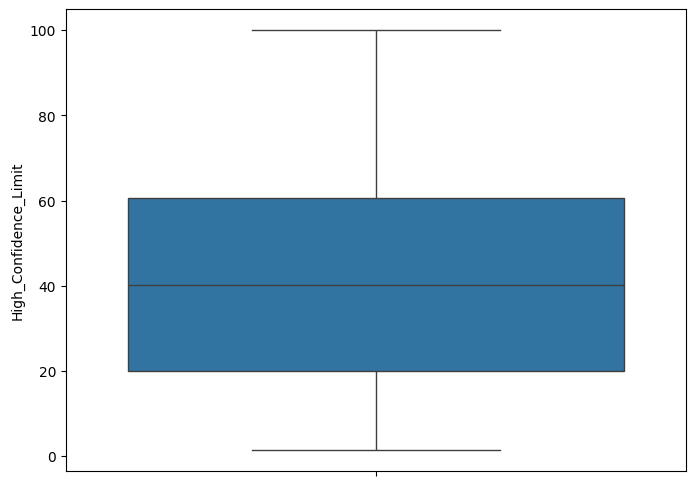

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data['High_Confidence_Limit'])
plt.show()

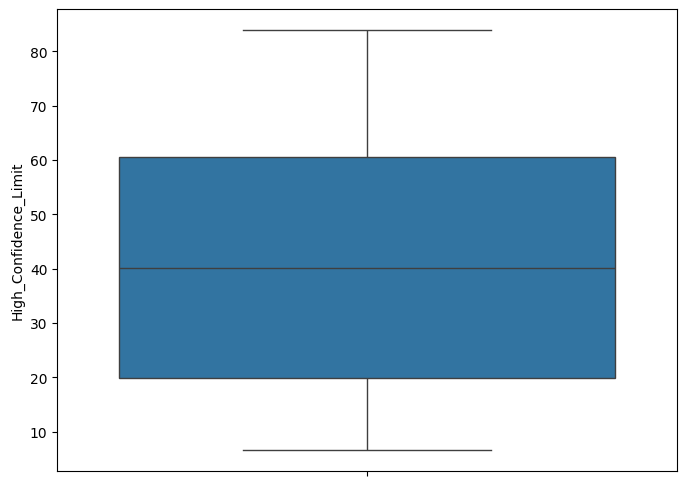

In [21]:
# Load your dataset
#data = pd.read_csv('/content/Alzheimer_Disease_notnull1.csv')

# Define a function to remove outliers using capping method
def remove_outliers_capping(df, High_Confidence_Limit, lower_threshold=None, upper_threshold=None):
    if lower_threshold is None:
        lower_threshold = df[High_Confidence_Limit].quantile(0.05)  # Set lower threshold to 5th percentile
    if upper_threshold is None:
        upper_threshold = df[High_Confidence_Limit].quantile(0.95)  # Set upper threshold to 95th percentile

    # Cap values below the lower threshold
    df[High_Confidence_Limit] = df[High_Confidence_Limit].apply(lambda x: lower_threshold if x < lower_threshold else x)

    # Cap values above the upper threshold
    df[High_Confidence_Limit] = df[High_Confidence_Limit].apply(lambda x: upper_threshold if x > upper_threshold else x)

# Specify the column name for which you want to remove outliers
column_name = 'High_Confidence_Limit'

# Call the function to remove outliers using capping method
remove_outliers_capping(data, column_name)
plt.figure(figsize=(8,6))
sns.boxplot(data['High_Confidence_Limit'])
plt.show()

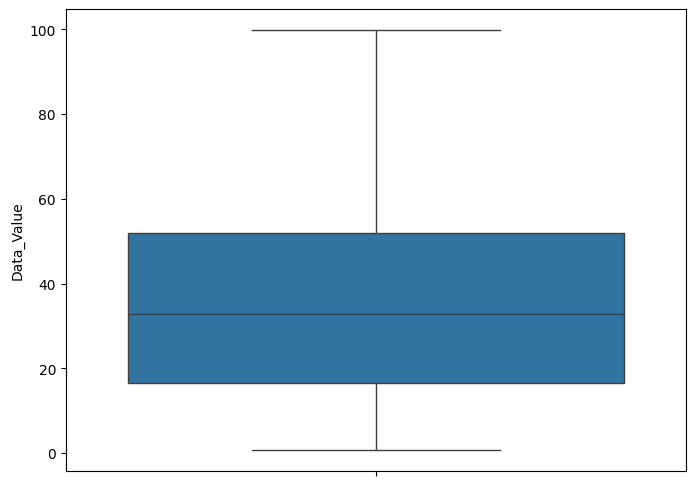

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data['Data_Value'])
plt.show()

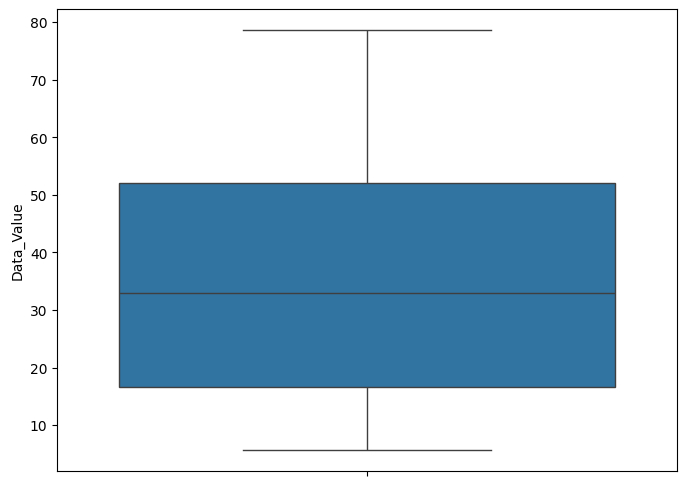

In [23]:
# Define a function to remove outliers using capping method
def remove_outliers_capping(df, Data_Value, lower_threshold=None, upper_threshold=None):
    if lower_threshold is None:
        lower_threshold = df[Data_Value].quantile(0.05)  # Set lower threshold to 5th percentile
    if upper_threshold is None:
        upper_threshold = df[Data_Value].quantile(0.95)  # Set upper threshold to 95th percentile

    # Cap values below the lower threshold
    df[Data_Value] = df[Data_Value].apply(lambda x: lower_threshold if x < lower_threshold else x)

    # Cap values above the upper threshold
    df[Data_Value] = df[Data_Value].apply(lambda x: upper_threshold if x > upper_threshold else x)

# Specify the column name for which you want to remove outliers
column_name = 'Data_Value'

# Call the function to remove outliers using capping method
remove_outliers_capping(data, column_name)
plt.figure(figsize=(8,6))
sns.boxplot(data['Data_Value'])
plt.show()

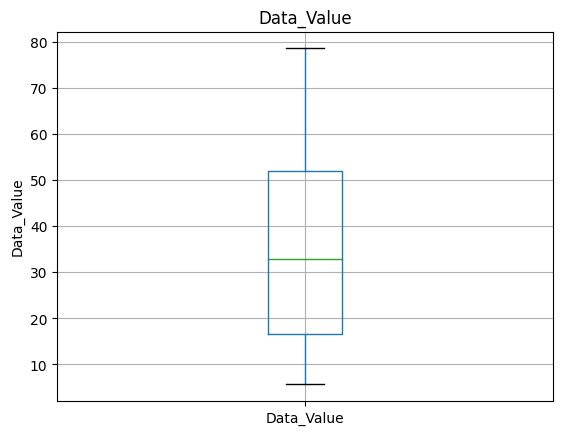

In [24]:
iqr_multiplier = 1.5
q1 = data['Data_Value'].quantile(0.25)
q3 = data['Data_Value'].quantile(0.75)
iqr = q3 - q1

  # Define lower and upper outlier bounds
lower_bound = q1 - iqr_multiplier * iqr
upper_bound = q3 + iqr_multiplier * iqr

  # Impute outliers with min and max values
data.loc[data['Data_Value'] < lower_bound,'Data_Value'] = lower_bound
data.loc[data['Data_Value'] > upper_bound,'Data_Value'] = upper_bound


data.boxplot(column='Data_Value')

plt.ylabel('Data_Value')

plt.title('Data_Value')

plt.show()

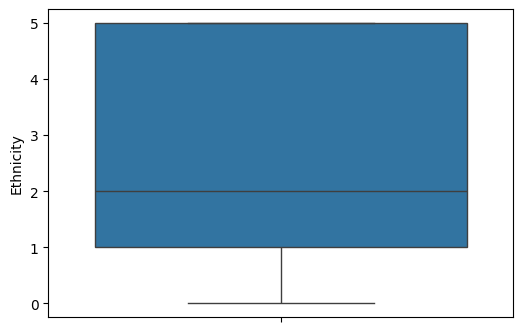

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(data['Ethnicity'])
plt.show()